# Bank Marketing Analysis

### Import standard libraries 

In [1]:
#import linear algebra and standard data manupulation libraries
import numpy as np
import pandas as pd 

#import visualisation libraries
import seaborn as sns 
import matplotlib.pyplot as plt

#to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
# Import dataset and display it with5 rows

data= pd.read_csv('bank.csv',delimiter=';')

#renamiing the target variable for our understanding and replace it to the original dataset

data.rename(columns={'y':'if_deposit'}, inplace =True)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,if_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


since the target variable is given just y,change it to a meaning full name 

## Data exploration and cleaning

In [3]:
#find the column information such as formate

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   int64 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   int64 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   contact     4521 non-null   object
 9   day         4521 non-null   int64 
 10  month       4521 non-null   object
 11  duration    4521 non-null   int64 
 12  campaign    4521 non-null   int64 
 13  pdays       4521 non-null   int64 
 14  previous    4521 non-null   int64 
 15  poutcome    4521 non-null   object
 16  if_deposit  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 423.9+ KB


Thre are 7 numerical columns such as age, balance, daya, duration, campaign, pdays and previous. Rest of the 10 columns are catagorical variables

In [4]:
# find number of rows the data set contains

print("Data set has {row} rows".format(row=data.shape[0]))

Data set has 4521 rows


In [5]:
#find number of missing value in each column

data.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
if_deposit    0
dtype: int64

There is no missing value in the data

## Numeric columns and Categorical columns 

In [6]:
#form an array of numerical columns 

num_cols = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']


#form an array of catagorical columns

cat_cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

## Numerical Columns Explorations 

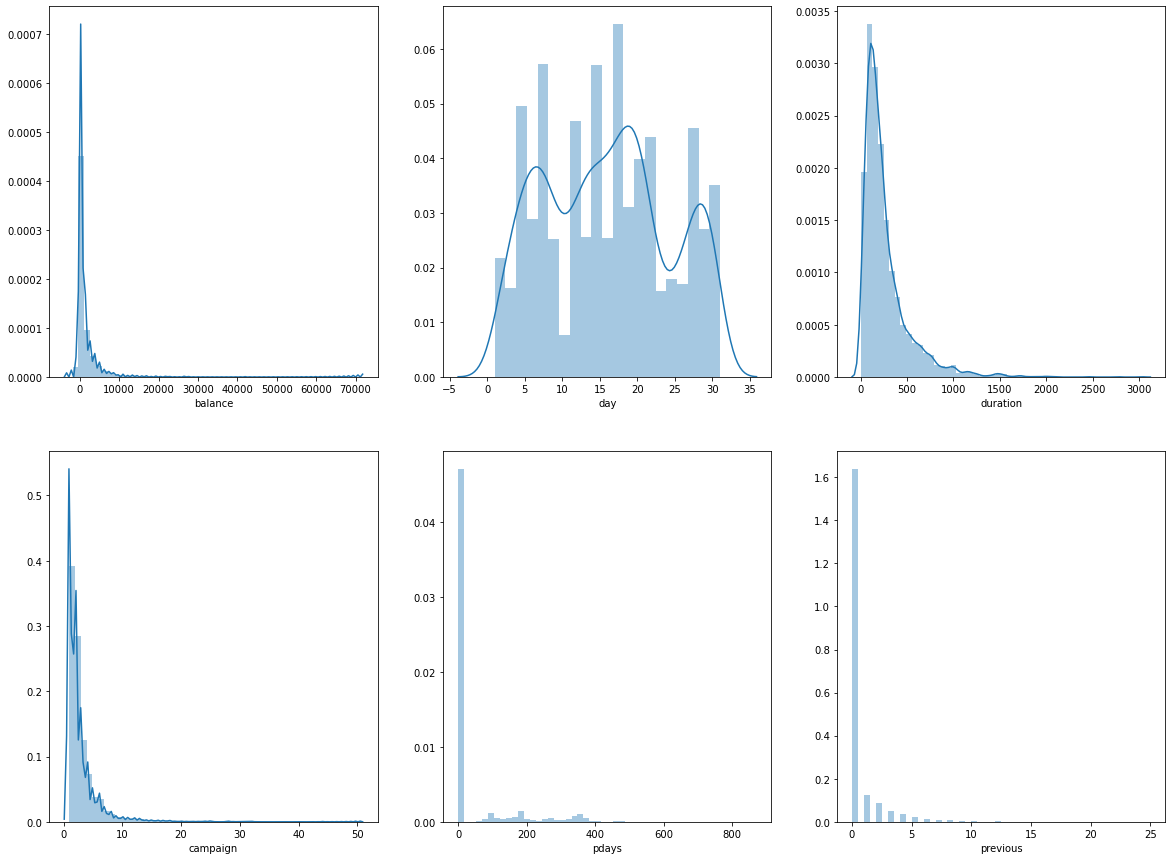

In [7]:
# Form distplot for numerical columns evaluations

plt.figure(figsize=(20, 15))
Z=range(1,7)

for num_col, z in zip(num_cols,Z):
    plt.subplot(2,3,z)
    sns.distplot(data[num_col])    
    
plt.show()

We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns). Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise.
<br> Let's look closer at the values of 'campaign', 'pdays' and 'previous' columns:

In [8]:
#descriptionof the 'pdays', 'campaign' and 'previous' columns

data[['pdays','campaign','previous']].describe()

,pdays,campaign,previous
count,4521.000000,4521.000000,4521.000000
mean,39.766645,2.793630,0.542579
std,100.121124,3.109807,1.693562
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,50.000000,25.000000


<b> 1)pdays column

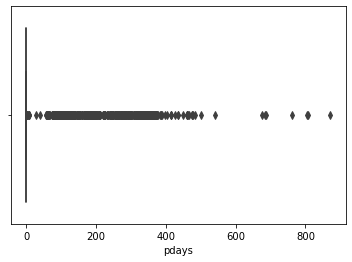

In [9]:
#box plot for pdays to check outlier in pdays column 

sns.boxplot(data['pdays'])

We find some outliers in the pdays column which has to be cleaned

In [10]:
#percentage of -1 value in 'pdays' columns

print('Percentage of -1 values in pdays column: ',(len (data[data['pdays'] ==-1]) / len(data) )* 100)

#percentage of vaues graeter than 400 value in 'pdays' columns

print('Percentage of pdays greater than 400 days:',(len (data[data['pdays'] >400]) / len(data) )* 100)

Percentage of -1 values in pdays column:  81.95089581950896
Percentage of pdays greater than 400 days: 0.57509400575094


'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign 
<br> Looking closer into 'pdays' data we can see that:
* Only 0.57 % of values are above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values
* pdays has the value -1  more than 81 % of data, We dont know what the value -1 means so it is better to drop the column 

<b>2) campaign column 

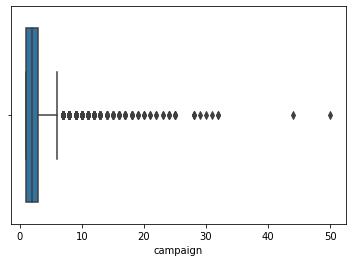

In [11]:
#box plot for pdays to check outlier for campaign column

sns.boxplot(data['campaign'])

'campaign' holds the number of contacts performed during this campaign and for this client (numeric, includes last contact)


<br>Campaign column has so many outliers which represents the data is noisy, it has to be corrented
<br> Let us check the number of rows contain the values away from the normal data and find the way to solve

In [12]:
print("Number of rows with more than 34 days  ",len(data[data['campaign']>34]))
print("number of rows with more than 25 days  ",len(data[data['campaign']>25]))
print("number of rows with more than 20 days  ",len(data[data['campaign']>20]))
print("number of rows with more than 10 days  ",len(data[data['campaign']>10]))

Number of rows with more than 34 days   2
number of rows with more than 25 days   10
number of rows with more than 20 days   23
number of rows with more than 10 days   130


Numbers for 'campaign' above 25 are clearly noise, so I suggest to impute them with average campaign values while data cleaning.

<b>3) previous column

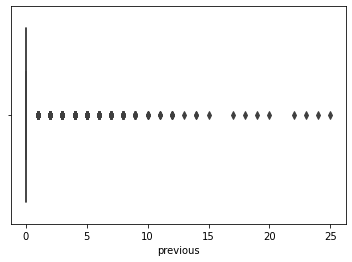

In [13]:
#box plot for pdays to check outlier for previous column

sns.boxplot(data['previous'])

In [14]:
data['previous'].value_counts()

0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
20       1
24       1
23       1
13       1
17       1
19       1
18       1
22       1
15       1
25       1
Name: previous, dtype: int64

In [15]:
print("percentage of rows with more than 25 value is ",len(data[data['previous']>25])/len(data)*100)

percentage of rows with more than 25 value is  0.0


'previous' holds the number of contacts performed before this campaign and for this client (numeric)
Numbers for 'previous' above 25 are also really strange, so I suggest to impute them with average campaign values while data cleaning.

### Catagorical Columns Explorations

In [16]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

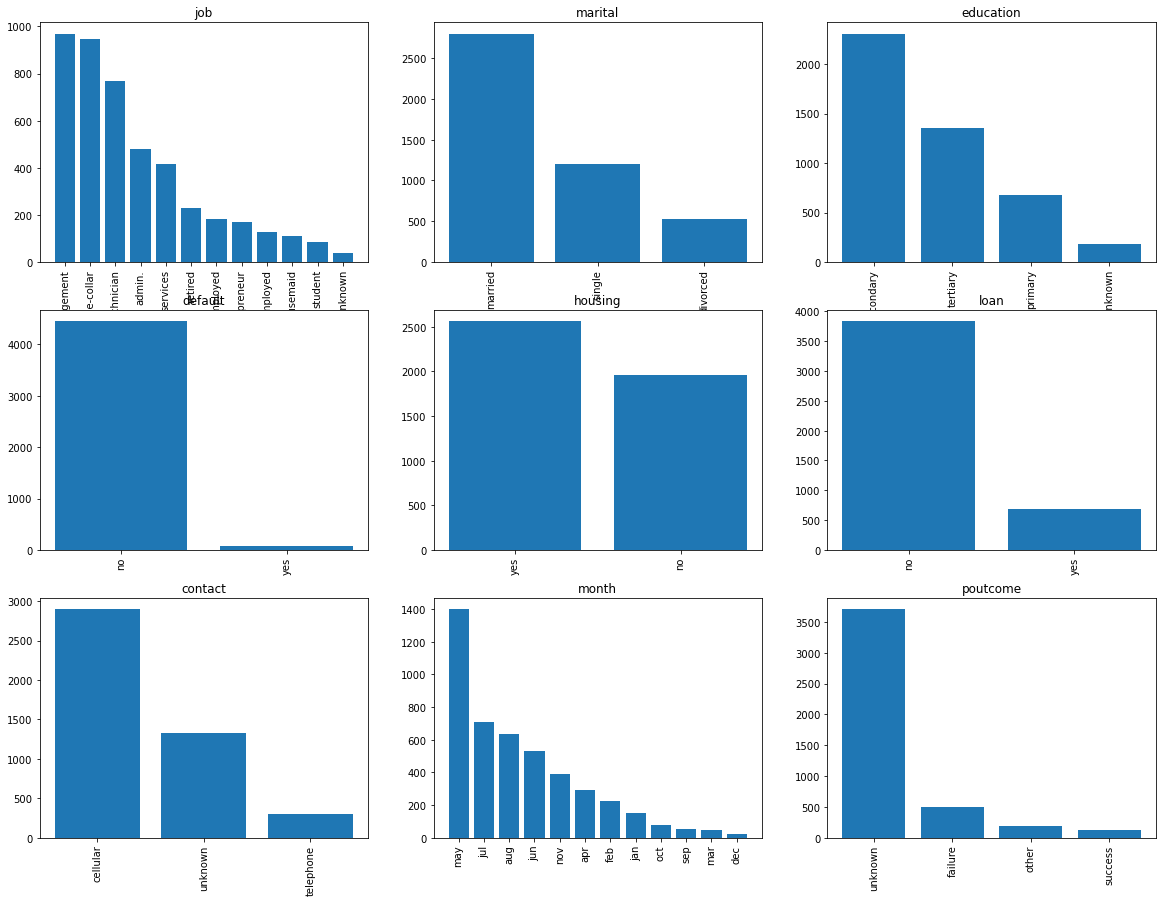

In [17]:
#Create bar plots for the catagorical columns 

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15)) 

#loop catagorical columns to form all the plots in 3*3 subplots

counter = 0    
for cat_col in cat_cols:
    val_counts = data[cat_col].value_counts()
    
    # taking the modulus of dividend of 3(matrix dimension) for x axis  
    # remainder for y axis to form axis for each plot
    
    x = counter // 3
    y = counter % 3
    
    
    axs[x, y].bar(val_counts.index, val_counts.values)
    axs[x, y].set_title(cat_col)  #title for each plot
    
    # to rotate the X axis lables to avoid messy lables 
    for tick in axs[x, y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()


From the plot of various catagorical columns the columns 'defalt' and 'loan' shows great diffrence in their catagorical range  <br> so Let us look into the columns

In [18]:
#'default'column value counts

print('Percentage of no in the default column',data['default'].value_counts().values[0]/len(data) *100)
print('Percentage of yes in the default column',data['default'].value_counts().values[1]/len(data) *100)

Percentage of no in the default column 98.31895598318955
Percentage of yes in the default column 1.6810440168104401


'default' column represent whether there is credit in the account 
<br> since the percentage difrence for the yes and no is more, droping the column is better choice 

In [19]:
#'loan' column value counts

print('Percentage of no in the loan column',data['loan'].value_counts().values[0]/len(data) *100)
print('Percentage of yes in the loan column',data['loan'].value_counts().values[1]/len(data) *100)

Percentage of no in the loan column 84.71577084715771
Percentage of yes in the loan column 15.284229152842292


'loan' column represent wethere the customer has personal loan or not 
<br>since the percentage difference is not much large in number no need to remove the column

### Analysis of the dependent column with independaent variables columns

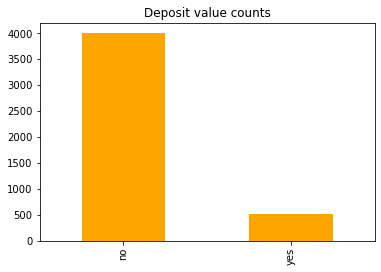

In [20]:
#if_deposit column value counts bar plot

data['if_deposit'].value_counts().plot.bar(title='Deposit value counts',color='orange')

'if_deposit'(traget variable) with 
<br>(feature varialbles)
<br> *job
<br> *marital
<br> *education 
<br> *contact

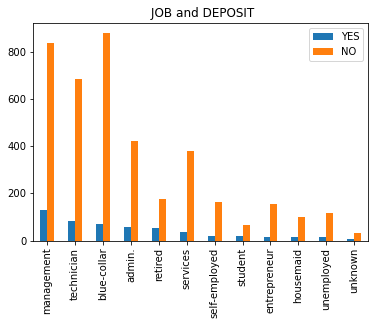

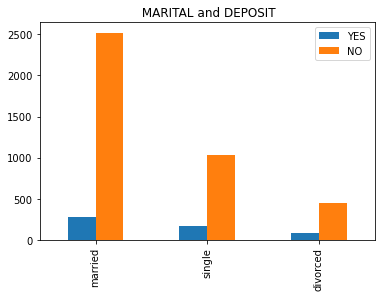

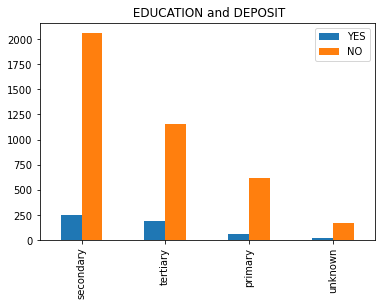

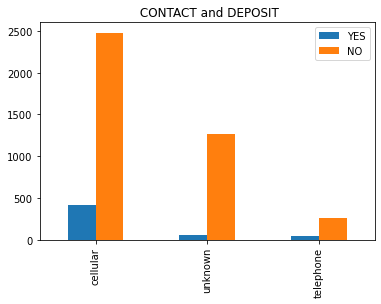

In [21]:
#'job' with target column
#form a pandas dataframe with number of deposites done and not done with respect to job

job_df=pd.DataFrame()
job_df['YES']=data[data['if_deposit']=='yes']['job'].value_counts()
job_df['NO']=data[data['if_deposit']=='no']['job'].value_counts()

job_df.plot.bar(title=" JOB and DEPOSIT")

#'marital' with target variable 
#form a pandas dataframe with number of deposites done and not done with respect to martial status

mar_df =pd.DataFrame()
mar_df['YES']=data[data['if_deposit']=='yes']['marital'].value_counts()
mar_df['NO']=data[data['if_deposit']=='no']['marital'].value_counts()

mar_df.plot.bar(title=" MARITAL and DEPOSIT")

#'education' with target column
#form a pandas dataframe with number of deposites done and not done with respect to education

edu_df=pd.DataFrame()
edu_df['YES']=data[data['if_deposit']=='yes']['education'].value_counts()
edu_df['NO']=data[data['if_deposit']=='no']['education'].value_counts()

edu_df.plot.bar(title=" EDUCATION and DEPOSIT")

#'contact' with target column
#form a pandas dataframe with number of deposites done and not done with respect to contact

ct_df=pd.DataFrame()
ct_df['YES']=data[data['if_deposit']=='yes']['contact'].value_counts()
ct_df['NO']=data[data['if_deposit']=='no']['contact'].value_counts()

ct_df.plot.bar(title=" CONTACT and DEPOSIT")

Regarding the diagrams we can tell that according to our dataset:
1. Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
2. Divorced customers are less likely to subscribe for term deposit.
3. Customers with 'telephone' type of contact are less likely to subscribe for term deposit.

<B> Analysis of Numerical columns with target columns

In [22]:
num_cols

['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [23]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (data[data['if_deposit'] == 'yes'][['if_deposit','balance']].describe())['balance']
b_df['balance_no'] = (data[data['if_deposit'] == 'no'][['if_deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,521.000000,4000.000000
mean,1571.955854,1403.211750
std,2444.398956,3075.349313
min,-1206.000000,-3313.000000
25%,171.000000,61.000000
50%,710.000000,419.500000
75%,2160.000000,1407.000000
max,26965.000000,71188.000000


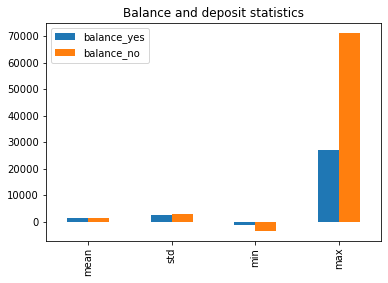

In [24]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [25]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (data[data['if_deposit'] == 'yes'][['if_deposit','age']].describe())['age']
a_df['age_no'] = (data[data['if_deposit'] == 'no'][['if_deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,521.000000,4000.000000
mean,42.491363,40.998000
std,13.115772,10.188398
min,19.000000,19.000000
25%,32.000000,33.000000
50%,40.000000,39.000000
75%,50.000000,48.000000
max,87.000000,86.000000


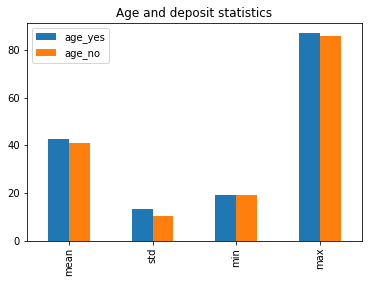

In [26]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [27]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (data[data['if_deposit'] == 'yes'][['if_deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (data[data['if_deposit'] == 'no'][['if_deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,521.000000,4000.000000
mean,2.266795,2.862250
std,2.092071,3.212609
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,24.000000,50.000000


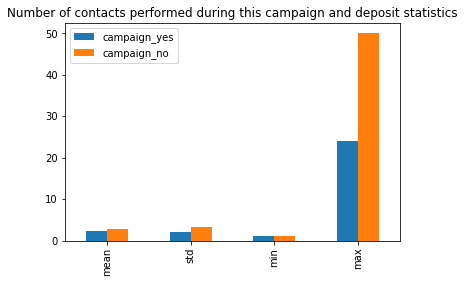

In [28]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [29]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (data[data['if_deposit'] == 'yes'][['if_deposit','previous']].describe())['previous']
p_df['previous_no'] = (data[data['if_deposit'] == 'no'][['if_deposit','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,521.000000,4000.000000
mean,1.090211,0.471250
std,2.055368,1.627371
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,0.000000
max,14.000000,25.000000


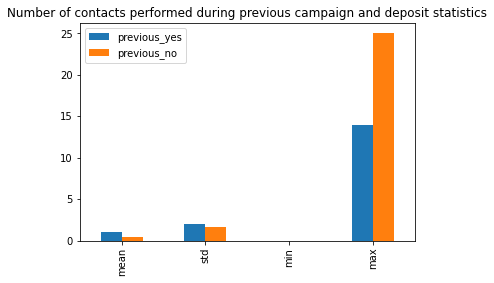

In [30]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

Looking at the diagrams above we can conclude that:
1. People who subscribed for term deposit tend to have greater balance and age values.
2. People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

## Data Cleaning  and Preparation

Data cleaning has to be done and prepare the data for modeling.Data Cleaning steps fot this data set are as follows:

1. Drop the inefficient columns
2. Normalise the columns by replacing mean values 
3. Convert the 'yes' or 'no' columns to bool columns 
4. Convert all the catagorical column to numeric columns
5. Get independent variable data set and target set


In [31]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,if_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


1. Drop inefficient feature 

<br> As aldready mentioned in the data exploration part column 'default' can be droped, since the data has high diffrence in their value counts
<br> Column pdays can also be droped as it contain more than 50 % of meaningless value 

In [32]:
data= data.drop(['default','pdays'],axis=1)

2. Replacing mean value to normalise data

In [33]:
#replace the campign column values greater than 35  (outlier) with mean value 

mean= round(data['campaign'].mean()) #find the mean value of the campaign column
indx = list(data.columns).index('campaign') #find campaign column index

#replace the determined mean value to the number greater than 35
j=0
for i in data.index:
    if data.iloc[j,indx]<34:
        data['campaign']= data.iloc[j,11]
    else:
        data['campaign']=mean
        j=j+1

3. Convert the 'yes' or 'no' columns to bool columns

In [34]:
# to replace 'yes' or 'no' columns with 1 and 0

def bool_replace(x):
    return x.map ({'yes':1,'no':0})

#columns with yes or no values
bool_cols = ['housing', 'loan', 'if_deposit']

for bool_col in bool_cols:
    data[[bool_col]]= data[[bool_col]].apply(bool_replace)

4. Convert all the catagorical column to numeric columns

In [35]:
# remaing catacorical columns list

new_cat_cols= ['age','job','marital','education','contact','month','poutcome']
                    
# to create dummy columns 
dummy_cols= pd.get_dummies(data[new_cat_cols], drop_first= True)

#concate the dummy column with the orginal data
cleaned_data= pd.concat([data, dummy_cols],axis=1)

#drop the column that are duplicated from original data
cleaned_data.drop(new_cat_cols, axis=1, inplace=True)

Cleaned data set from which model can be build

In [36]:
cleaned_data.head()

,balance,housing,loan,day,duration,campaign,previous,if_deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1787,0,0,19,79,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,4789,1,1,11,220,1,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1350,1,0,16,185,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1476,1,1,3,199,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,1,0,5,226,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


### Data Preparation for model building 

5. Feature variable data set 'X' and target list 'y'

In [37]:
#feature set
X= cleaned_data.drop('if_deposit',axis=1)

#target list 
y= cleaned_data[['if_deposit']]

# Model building to predict the outcom 

1. Split the data set into train and test 

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
num_cols

['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [40]:
numeric=['balance', 'day', 'duration', 'campaign', 'previous']

In [41]:
#normalising the data 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[numeric]=scaler.fit_transform(X_train[numeric])

In [42]:
#Random Forest method 

from sklearn.ensemble import RandomForestClassifier
clasifier= RandomForestClassifier(n_estimators=25,criterion="entropy")
clasifier.fit(X_train,y_train)  #fiting the model for train set

RandomForestClassifier(criterion='entropy', n_estimators=25)

In [43]:
#predict the output

y_train_prd= clasifier.predict(X_train)

<b> Confusion Matrics and accuracy score for train dataset

To check the accuracy for the trained model, I used confusion metrics accuracy method

In [44]:
#import metrics from sklearn library

from sklearn import metrics
conf_mx= metrics.confusion_matrix(y_train,y_train_prd)
acc_scr_percent= (metrics.accuracy_score(y_train,y_train_prd))*100

print(conf_mx)
print('The accuracy percentage for the predicted value is', acc_scr_percent)

[[2795    0]
 [   5  364]]
The accuracy percentage for the predicted value is 99.84197218710493


From theconfusion matrics it is observed that 0+5 = 5 incorrect Prediction.  <br>The accuracy greater than 95% which is a good score.

## Feature importance from the trained model

In [63]:
headers = ['Feature', 'Score']
values = sorted(zip(X_train.columns, clasifier.feature_importances_), key=lambda x: x[1]*-1)
clasifier_feature_importances_ = pd.DataFrame(values, columns=headers)
clasifier_feature_importances_

,Feature,Score
0,duration,0.305864
1,balance,0.133370
2,day,0.106356
3,poutcome_success,0.039601
4,previous,0.033143
5,contact_unknown,0.022381
6,housing,0.021156
7,month_oct,0.019993
8,education_tertiary,0.017786
9,education_secondary,0.017177


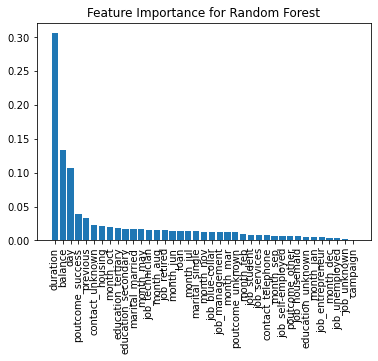

In [64]:
# feature importance graph

x_pos = np.arange(0, len(clasifier_feature_importances_))
plt.bar(x_pos, clasifier_feature_importances_['Score'])
plt.xticks(x_pos, clasifier_feature_importances_['Feature'])
plt.xticks(rotation=90)
plt.title('Feature Importance for Random Forest')

plt.show()

The features such as 'duration' and 'balance' has high score representing the Random Forest model output prediction depend on those features.

### Visualizing the training Set result

### Random forest model for test set 

Let's now check the same model with test data set and predict the output

In [66]:
#scaling the test data set
X_test[numeric]=scaler.fit_transform(X_test[numeric])

#applying the model to the test set 
clasifier.fit(X_test,y_test)

#predict test data set output
y_test_prd= clasifier.predict(X_test)

<b> Confusion Matrics and accuracy score for test dataset

In [67]:
#accuracy percentage for test set

conf_mx_test= metrics.confusion_matrix(y_test,y_test_prd)
acc_scr_percent_test= (metrics.accuracy_score(y_test,y_test_prd))*100

print(conf_mx_test)
print('The accuracy percentage for the predicted value is', acc_scr_percent_test)

[[1205    0]
 [   1  151]]
The accuracy percentage for the predicted value is 99.92630803242447


From the confusion matrics it is observered that only one value is worgly predicted. <BR>The test data set also shown a good accuracy score 